<a href="https://colab.research.google.com/github/vineet891/DL-Assignment/blob/jagath/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
#data preprocessing
x_train=x_train/255
x_test = x_test/255

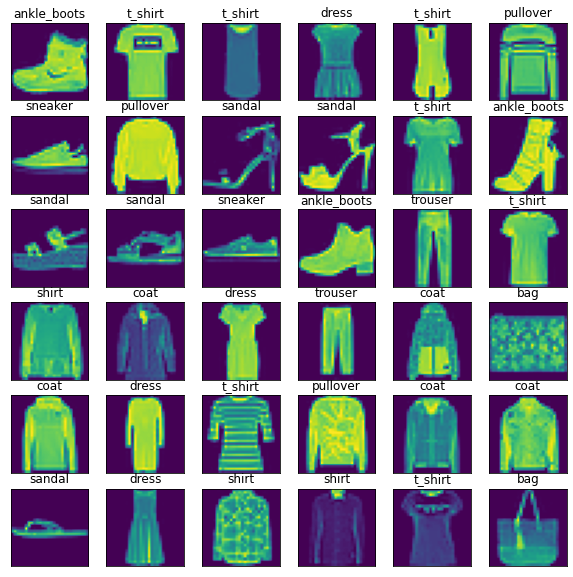

In [5]:
# train dataset datapoints
class_names = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

In [6]:
# one hot encoding the target variable
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [7]:
X_valid, X_train = x_train[:5000], x_train[5000:]
Y_valid, Y_train = y_train[:5000], y_train[5000:]

# **MODEL 1**

In [8]:
# Model 1
"""
Hidden Layers =1
Number of hidden nodes in layer 1 = 128
Activation Function =Relu
Loss function = Categorical cross entropy

"""
model1 = tf.keras.models.Sequential([
                               tf.keras.layers.Flatten(input_shape=(28,28)),
                                   tf.keras.layers.Dense(128,activation='relu'),
                                   tf.keras.layers.Dense(10,activation='softmax')
])


#define optimizer,loss function and evaluation metric
model1.compile(optimizer='sgd',
             loss="categorical_crossentropy",
             metrics=['accuracy'])

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
#train the model
history1 = model1.fit(x_train,y_train,epochs=50, validation_data=(X_valid, Y_valid))

Epoch 1/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7481 - accuracy: 0.7611 - val_loss: 0.5363 - val_accuracy: 0.8200
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5135 - accuracy: 0.8263 - val_loss: 0.4717 - val_accuracy: 0.8456
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4706 - accuracy: 0.8382 - val_loss: 0.4454 - val_accuracy: 0.8500
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4480 - accuracy: 0.8461 - val_loss: 0.4200 - val_accuracy: 0.8558
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4313 - accuracy: 0.8518 - val_loss: 0.4093 - val_accuracy: 0.8586
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4184 - accuracy: 0.8561 - val_loss: 0.4014 - val_accuracy: 0.8604
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4078 - accuracy: 0.8585 - val_loss: 0.3919 - val_accuracy:

Text(0.5, 1.0, 'Train - Accuracy')

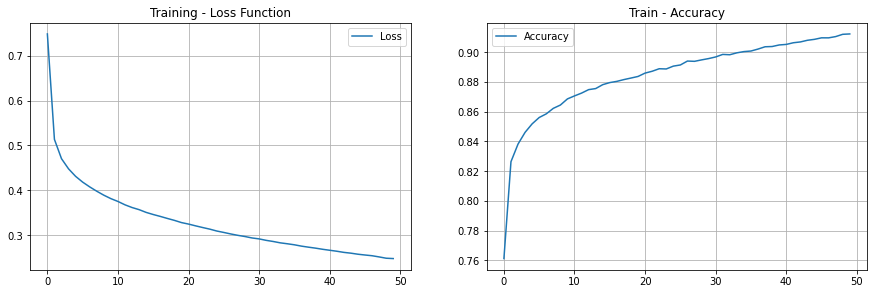

In [32]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.grid(True)
plt.plot(history1.history['loss'], label='Loss')
#plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.grid(True)
plt.plot(history1.history['accuracy'], label='Accuracy')
#plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [12]:
model1.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3425 - accuracy: 0.8812


[0.34249329566955566, 0.8812000155448914]

# **MODEL 2**

In [13]:
# Model 2
"""
Hidden Layers =1
Number of hidden nodes in layer 1 = 128
Activation Function = tanh
Loss function = Categorical cross entropy

"""
model2 = tf.keras.models.Sequential([
                               tf.keras.layers.Flatten(input_shape=(28,28)),
                                   tf.keras.layers.Dense(128,activation='tanh'),
                                   tf.keras.layers.Dense(10,activation='softmax')
])


#define optimizer,loss function and evaluation metric
model2.compile(optimizer='sgd',
             loss="categorical_crossentropy",
             metrics=['accuracy'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [14]:
#train the model
history2 = model2.fit(x_train,y_train,epochs=50, validation_data=(X_valid, Y_valid))

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7182 - accuracy: 0.7674 - val_loss: 0.5244 - val_accuracy: 0.8242
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5041 - accuracy: 0.8259 - val_loss: 0.4592 - val_accuracy: 0.8452
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4602 - accuracy: 0.8392 - val_loss: 0.4343 - val_accuracy: 0.8494
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4363 - accuracy: 0.8481 - val_loss: 0.4166 - val_accuracy: 0.8576
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4197 - accuracy: 0.8517 - val_loss: 0.3974 - val_accuracy: 0.8654
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4071 - accuracy: 0.8570 - val_loss: 0.3919 - val_accuracy: 0.8668
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3966 - accuracy: 0.8608 - val_loss: 0.3732 - val_accuracy:

Text(0.5, 1.0, 'Train - Accuracy')

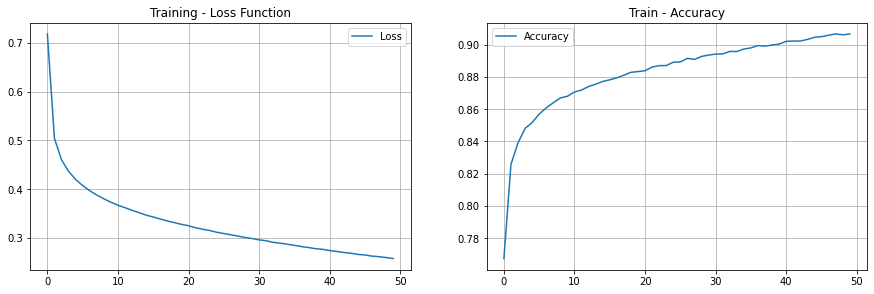

In [31]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.grid(True)
plt.plot(history2.history['loss'], label='Loss')
#plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.grid(True)
plt.plot(history2.history['accuracy'], label='Accuracy')
#plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [16]:
model2.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3406 - accuracy: 0.8782


[0.340616911649704, 0.8781999945640564]

# **MODEL 3**

In [ ]:
#model 3
"""

"""

# **MODEL 4**

In [ ]:
#model 4
"""

"""

# **MODEL 5**

In [ ]:
#model 5
"""

"""

# **MODEL 6**

In [ ]:
#model 6
"""

"""

# **MODEL 7**

In [ ]:
#model 7
"""

"""

# **MODEL 8**

In [ ]:
# Model 8
"""
Hidden Layers =4
Number of hidden nodes = 128,64,32,16
Activation Function = tanh
Loss function = KL divergence

"""
model8 = tf.keras.models.Sequential([
                               tf.keras.layers.Flatten(input_shape=(28,28)),
                                   tf.keras.layers.Dense(128,activation='tanh'),
                                   tf.keras.layers.Dense(64,activation='tanh'),
                                   tf.keras.layers.Dense(32,activation='tanh'),
                                   tf.keras.layers.Dense(16,activation='tanh'),
                                   tf.keras.layers.Dense(10,activation='softmax')
])


#define optimizer,loss function and evaluation metric
model8.compile(optimizer='sgd',
             loss= tf.keras.losses.kullback_leibler_divergence,
             metrics=['accuracy'])

model8.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                170       
Total params: 111,514
Trainable params: 111,514
Non-trainable params: 0
__________________________________________________

In [ ]:
#train the model
history8 = model8.fit(X_train,Y_train,epochs=50, validation_data=(X_valid, Y_valid))
#maybe overfitting 

Epoch 1/50
1719/1719 [==============================] - 9s 4ms/step - loss: 0.8385 - accuracy: 0.7440 - val_loss: 0.5631 - val_accuracy: 0.8168
Epoch 2/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5188 - accuracy: 0.8246 - val_loss: 0.4598 - val_accuracy: 0.8450
Epoch 3/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4548 - accuracy: 0.8431 - val_loss: 0.4279 - val_accuracy: 0.8510
Epoch 4/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4204 - accuracy: 0.8533 - val_loss: 0.3997 - val_accuracy: 0.8624
Epoch 5/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3971 - accuracy: 0.8603 - val_loss: 0.3825 - val_accuracy: 0.8668
Epoch 6/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3790 - accuracy: 0.8661 - val_loss: 0.3669 - val_accuracy: 0.8750
Epoch 7/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3659 - accuracy: 0.8689 - val_loss: 0.3629 - val_accuracy:

Text(0.5, 1.0, 'Train - Accuracy')

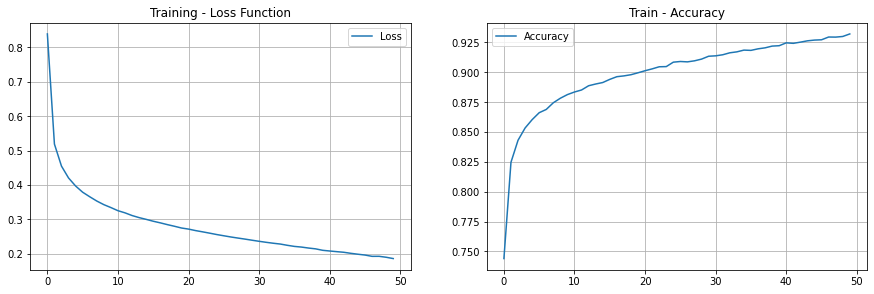

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.grid(True)
plt.plot(history8.history['loss'], label='Loss')
#plt.plot(history8.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.grid(True)
plt.plot(history8.history['accuracy'], label='Accuracy')
#plt.plot(history8.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [ ]:
model8.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3432 - accuracy: 0.8830


[0.34320494532585144, 0.8830000162124634]

# **MODEL 9**

In [17]:
# Model 9
"""
Hidden Layers =5
Number of hidden nodes = 256,128,64,32,16
Activation Function = Relu
Loss function = Categorical cross entropy

"""
model9 = tf.keras.models.Sequential([
                               tf.keras.layers.Flatten(input_shape=(28,28)),
                                   tf.keras.layers.Dense(256,activation='relu'),
                                   tf.keras.layers.Dense(128,activation='relu'),
                                   tf.keras.layers.Dense(64,activation='relu'),
                                   tf.keras.layers.Dense(32,activation='relu'),
                                   tf.keras.layers.Dense(16,activation='relu'),
                                   tf.keras.layers.Dense(10,activation='softmax')
])


#define optimizer,loss function and evaluation metric
model9.compile(optimizer='sgd',
             loss="categorical_crossentropy",
             metrics=['accuracy'])

model9.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

In [18]:
#train the model
history9 = model9.fit(x_train,y_train,epochs=50, validation_data=(X_valid, Y_valid))

Epoch 1/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9068 - accuracy: 0.6850 - val_loss: 0.5135 - val_accuracy: 0.8184
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4847 - accuracy: 0.8290 - val_loss: 0.4170 - val_accuracy: 0.8532
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4238 - accuracy: 0.8491 - val_loss: 0.3746 - val_accuracy: 0.8672
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3866 - accuracy: 0.8612 - val_loss: 0.3463 - val_accuracy: 0.8760
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3625 - accuracy: 0.8681 - val_loss: 0.3257 - val_accuracy: 0.8820
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3424 - accuracy: 0.8750 - val_loss: 0.2936 - val_accuracy: 0.8944
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3274 - accuracy: 0.8794 - val_loss: 0.2989 - val_accuracy:

Text(0.5, 1.0, 'Train - Accuracy')

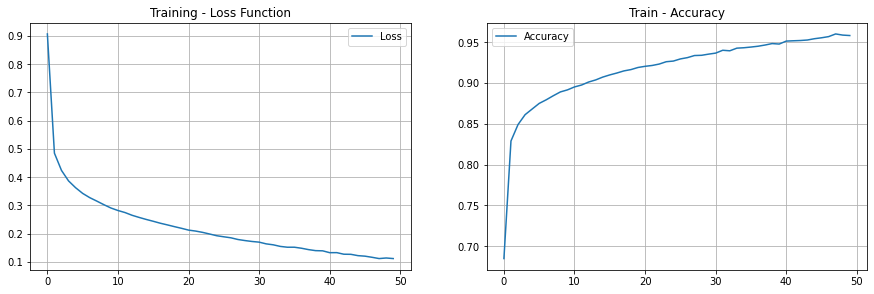

In [30]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.grid(True)
plt.plot(history9.history['loss'], label='Loss')
#plt.plot(history9.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.grid(True)
plt.plot(history9.history['accuracy'], label='Accuracy')
#plt.plot(history9.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [20]:
model9.evaluate(x_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.4078 - accuracy: 0.8877


[0.40775299072265625, 0.8877000212669373]

# **MODEL 10**

In [ ]:
#model 10
"""

"""

# **MODEL 11**

In [ ]:
#model 11
"""

"""

# **MODEL 12**

In [ ]:
#model 12
"""

"""

# **MODEL 13**

In [25]:
# Model 13
"""
Hidden Layers =8
Number of hidden nodes = 1024,512,256,256,128,128,64,32
Activation Function = Relu
Loss function = Categorical cross entropy

"""
model13 = tf.keras.models.Sequential([
                               tf.keras.layers.Flatten(input_shape=(28,28)),
                                   tf.keras.layers.Dense(1024,activation='relu'),
                                   tf.keras.layers.Dense(512,activation='relu'),
                                   tf.keras.layers.Dense(256,activation='relu'),
                                   tf.keras.layers.Dense(256,activation='relu'),
                                   tf.keras.layers.Dense(128,activation='relu'),
                                   tf.keras.layers.Dense(128,activation='relu'),
                                   tf.keras.layers.Dense(64,activation='relu'),
                                   tf.keras.layers.Dense(32,activation='relu'),
                                   tf.keras.layers.Dense(10,activation='softmax')
])


#define optimizer,loss function and evaluation metric
model13.compile(optimizer='sgd',
             loss="categorical_crossentropy",
             metrics=['accuracy'])

model13.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_20 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_21 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_22 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_23 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_24 (Dense)             (None, 128)              

In [26]:
#train the model
history13 = model13.fit(x_train,y_train,epochs=50, validation_data=(X_valid, Y_valid))

Epoch 1/50
1875/1875 [==============================] - 30s 16ms/step - loss: 0.8128 - accuracy: 0.7175 - val_loss: 0.4557 - val_accuracy: 0.8440
Epoch 2/50
1875/1875 [==============================] - 30s 16ms/step - loss: 0.4521 - accuracy: 0.8393 - val_loss: 0.4201 - val_accuracy: 0.8462
Epoch 3/50
1875/1875 [==============================] - 31s 16ms/step - loss: 0.3868 - accuracy: 0.8598 - val_loss: 0.3171 - val_accuracy: 0.8858
Epoch 4/50
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3500 - accuracy: 0.8714 - val_loss: 0.3136 - val_accuracy: 0.8850
Epoch 5/50
1875/1875 [==============================] - 29s 16ms/step - loss: 0.3216 - accuracy: 0.8816 - val_loss: 0.2848 - val_accuracy: 0.8966
Epoch 6/50
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3036 - accuracy: 0.8889 - val_loss: 0.2574 - val_accuracy: 0.9092
Epoch 7/50
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2862 - accuracy: 0.8941 - val_loss: 0.2564 -

Text(0.5, 1.0, 'Train - Accuracy')

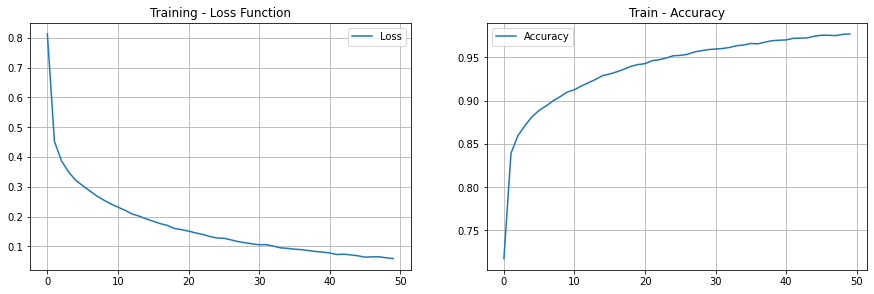

In [29]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.grid(True)
plt.plot(history13.history['loss'], label='Loss')
#plt.plot(history13.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.grid(True)
plt.plot(history13.history['accuracy'], label='Accuracy')
#plt.plot(history13.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [28]:
model13.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.5156 - accuracy: 0.8927


[0.5156052112579346, 0.8927000164985657]

# **MODEL 14**

In [ ]:
#model 14
"""

"""

# **MODEL 15**

In [ ]:
#model 15
"""

"""

# **MODEL 16**

In [ ]:
# Model 16
"""
Hidden Layers =10
Number of hidden nodes = 1024,512,256,256,128,128,64,32,16,16
Activation Function = tanh
Loss function = Categorical cross entropy

"""
model16 = tf.keras.models.Sequential([
                               tf.keras.layers.Flatten(input_shape=(28,28)),
                                   tf.keras.layers.Dense(1024,activation='tanh'),
                                   tf.keras.layers.Dense(512,activation='tanh'),
                                   tf.keras.layers.Dense(256,activation='tanh'),
                                   tf.keras.layers.Dense(256,activation='tanh'),
                                   tf.keras.layers.Dense(128,activation='tanh'),
                                   tf.keras.layers.Dense(128,activation='tanh'),
                                   tf.keras.layers.Dense(64,activation='tanh'),
                                   tf.keras.layers.Dense(32,activation='tanh'),
                                   tf.keras.layers.Dense(16,activation='tanh'),
                                   tf.keras.layers.Dense(16,activation='tanh'),
                                   tf.keras.layers.Dense(10,activation='softmax')
])


#define optimizer,loss function and evaluation metric
model16.compile(optimizer='sgd',
             loss="categorical_crossentropy",
             metrics=['accuracy'])

model16.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_6 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_10 (Dense)             (None, 128)              

In [ ]:
#train the model
history16 = model16.fit(x_train,y_train,epochs=50, validation_data=(X_valid, Y_valid))

Epoch 1/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7461 - accuracy: 0.7832 - val_loss: 0.4911 - val_accuracy: 0.8444
Epoch 2/50
1875/1875 [==============================] - 10s 6ms/step - loss: 0.4687 - accuracy: 0.8434 - val_loss: 0.3989 - val_accuracy: 0.8712
Epoch 3/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4074 - accuracy: 0.8600 - val_loss: 0.3747 - val_accuracy: 0.8754
Epoch 4/50
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3724 - accuracy: 0.8702 - val_loss: 0.3343 - val_accuracy: 0.8838
Epoch 5/50
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3500 - accuracy: 0.8765 - val_loss: 0.3082 - val_accuracy: 0.8944
Epoch 6/50
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3326 - accuracy: 0.8825 - val_loss: 0.2974 - val_accuracy: 0.8974
Epoch 7/50
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3178 - accuracy: 0.8877 - val_loss: 0.2898 - val_ac

Text(0.5, 1.0, 'Train - Accuracy')

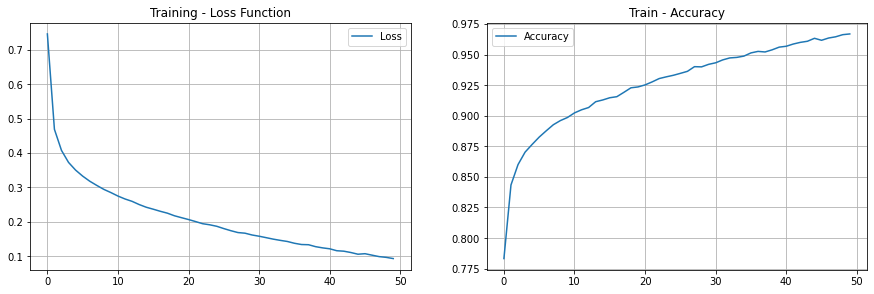

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.grid(True)
plt.plot(history16.history['loss'], label='Loss')
#plt.plot(history16.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.grid(True)
plt.plot(history16.history['accuracy'], label='Accuracy')
#plt.plot(history16.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [ ]:
model16.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.4081 - accuracy: 0.8845


[0.4080519676208496, 0.8845000267028809]